# EDA 
* Observations of Patterns
* Insights
* Potential Significants Features

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
class FeatureEngineering:
    '''
    class FeatureEngineering walk on the row data to re arrange, handle missing data 
    and deal with outliers 
    '''
    @staticmethod
    def rearrange_features(df):
        '''
        this function to re format data 
        some values are not acceptable
        some work of this function done in the data collector also, 
        when re formatiing number of bedrooms, baths, and re arrange amenities columns
        '''
        #drop all columns contain Unnamed in thier names
        df = df.iloc[:, ~df.columns.str.contains('^Unnamed')]
        # update the values in series of house price in df by replacing K
        df.update(df[df['house_price'].str.contains('K')].iloc[:,0].str.replace('K','000'))
        # after arranging amenities as columns, drop am column which contanins all amenities 
        df = df.drop(columns=['am'])
        # change the type of values in the df
        df=df.astype('int')
        return df

    
    @staticmethod
    def na_percentage_in_rows(df):
        '''
        This function search for missing values in Rows, 
        return a stat of all rows with missing values, 
        each row with its missing values percentage.  
        '''
        # get all index of rows that contain NaNs 
        is_NaN = df. isnull()
        row_has_NaN = is_NaN. any(axis=1)
        rows_with_NaN = df[row_has_NaN]

        # create stat with rows index and its NaN value percentage
        stat = pd.DataFrame()
        stat['row'] = df[row_has_NaN].index
        stat['na percentage'] = ((36-df[row_has_NaN].apply(lambda x: x.count(), axis=1))/36).tolist()
        # return all index has a percentage of missing more than or equal 0.5 
        return stat,stat[stat['na percentage']>=0.5].iloc[:,0]
    
    @staticmethod
    def na_percentage_in_cols(df):
        '''
        This function search for missing values in features, 
        return a stat of all columns with missing values, 
        each column with its missing values percentage. 
        '''
        # create stat with columns and its NaN value percentage
        stat =pd.DataFrame()
        stat['col'] = df.columns
        stat['na percentage']=df.isna().mean().tolist()
        # return all columns name has a percentage of missing more than or equal 0.5 
        return stat,stat[stat['na percentage']>=0.5].iloc[:,0]

    @staticmethod
    def handle_missings(df):
        '''
        This function check the percentage of NaN values in rows and columns 
        and deside wether to drop them or not
        '''
        s1,index=FeatureEngineering.na_percentage_in_rows(df)
        s2,features=FeatureEngineering.na_percentage_in_cols(df)
        print(features)
        # drop all index has a percentage of missing more than or equal 0.5
        df = df.drop(index)
        if features.size!=0:
            df = df.drop(columns = [features])
        return df



    def drop_outliers(df,data_series):
        '''
        This function deals with outliers 
        this function will get the data and get rid of all outliers using IQR analysis
        '''
        # calculate Q1,Q3
        Q1, Q3 = df[data_series].quantile([0.25, 0.75]).values
        # IQR value
        IQR = Q3 - Q1
        # find limits of the data  
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR

        # finding index of all data outside the limits
        s=df[data_series][( df[data_series] < lower_limit) |
                          ( df[data_series] > upper_limit) ]
        s.index
        # drop data outside the limits
        df = df.drop(s.index)
        return df


# EDA

In [3]:
df = pd.read_excel('nadataset.xlsx')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [4]:
#get a look at the first 10 observations 
df.head(10)

,house_price,bedrooms,baths,am,On Site Laundry,Air Conditioning,Dishwasher,Deck,Hardwood Floor,Central Heat,...,Swimming Pool,Onsite Management,Balcony,Ceiling Fan,Controlled Access,FirePlace,Garage Parking,High Ceilings,Outdoor Space,Walk In Closet
0,7800,2,2,"On Site Laundry, Air Conditioning, High Ceilin...",1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
1,5499,2,2,"On Site Laundry, High Ceilings, Dishwasher, Ba...",1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,3250,1,1,"On Site Laundry, High Ceilings, Dishwasher, Ba...",1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,3905,2,1,"Dishwasher, Elevator",0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4250,1,1,"Dishwasher, On Site Laundry, Hardwood Floor, H...",1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
5,5825,2,2,"On Site Laundry, High Ceilings, Dishwasher, Ha...",1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
6,3195,2,2,"Hardwood Floor, Dishwasher",0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,3895,1,1,"Dishwasher, On Site Laundry, Hardwood Floor, H...",1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
8,3085,0,1,"Balcony, On Site Laundry, Deck, In Unit Laundr...",1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
9,4495,1,1,"Balcony, On Site Laundry, Deck, In Unit Laundr...",1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [5]:
#get a look at the last 10 observations 
df.tail(10)

,house_price,bedrooms,baths,am,On Site Laundry,Air Conditioning,Dishwasher,Deck,Hardwood Floor,Central Heat,...,Swimming Pool,Onsite Management,Balcony,Ceiling Fan,Controlled Access,FirePlace,Garage Parking,High Ceilings,Outdoor Space,Walk In Closet
10990,2577,2,2,"Ceiling Fan, Dishwasher, Balcony, Carpet, Walk...",1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
10991,2750,2,2,"Hardwood Floor, Dishwasher, Elevator, On Site ...",1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10992,2000,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10993,3795,3,1,"On Site Laundry, Dishwasher, Hardwood Floor, C...",1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
10994,4250,3,1,"In Unit Laundry, Hardwood Floor, Assigned Park...",0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10995,5400,2,1,"In Unit Laundry, Hardwood Floor, Carpet, Assig...",0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10996,7995,1,2,"In Unit Laundry, Hardwood Floor, Assigned Park...",0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
10997,2947,3,3,"In Unit Laundry, High Ceilings, Walk In Closet...",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
10998,2700,3,3,"Ceiling Fan, Hardwood Floor, Carpet, Furnished...",1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
10999,4500,3,2,"On Site Laundry, Garage Parking, Outdoor Space",1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [6]:
#get general information about the dataframe and its columns values count and type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   house_price           11000 non-null  object 
 1   bedrooms              11000 non-null  int64  
 2   baths                 11000 non-null  int64  
 3   am                    9927 non-null   object 
 4   On Site Laundry       9927 non-null   float64
 5   Air Conditioning      9927 non-null   float64
 6   Dishwasher            9927 non-null   float64
 7   Deck                  9927 non-null   float64
 8   Hardwood Floor        9927 non-null   float64
 9   Central Heat          9927 non-null   float64
 10  Concierge Service     9927 non-null   float64
 11  Fitness Center        9927 non-null   float64
 12  Package Service       9927 non-null   float64
 13  Residents Lounge      9927 non-null   float64
 14  Storage               9927 non-null   float64
 15  Business Center    

# Missing values Handling

In [7]:
df.isna().sum()

house_price                0
bedrooms                   0
baths                      0
am                      1073
On Site Laundry         1073
Air Conditioning        1073
Dishwasher              1073
Deck                    1073
Hardwood Floor          1073
Central Heat            1073
Concierge Service       1073
Fitness Center          1073
Package Service         1073
Residents Lounge        1073
Storage                 1073
Business Center         1073
Door Person             1073
Roof Deck               1073
Elevator                1073
Dry Cleaning Service    1073
Garden                  1073
In Unit Laundry         1073
Assigned Parking        1073
Carpet                  1073
Furnished               1073
LEED Certified          1073
Swimming Pool           1073
Onsite Management       1073
Balcony                 1073
Ceiling Fan             1073
Controlled Access       1073
FirePlace               1073
Garage Parking          1073
High Ceilings           1073
Outdoor Space 

In [8]:
# check for missing values and the percentage of na in rows
rows_stat,rows = FeatureEngineering.na_percentage_in_rows(df) 
rows_stat

,row,na percentage
0,22,0.916667
1,42,0.916667
2,62,0.916667
3,82,0.916667
4,102,0.916667
...,...,...
1068,10952,0.916667
1069,10969,0.916667
1070,10972,0.916667
1071,10989,0.916667


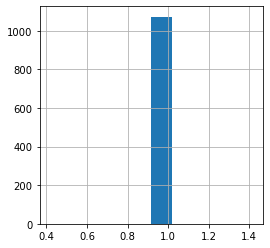

In [9]:
rows_stat['na percentage'].hist(bins=10, figsize=(4,4))

In [10]:
# check for missing values and the percentage of na in columns
feature_stat,features = FeatureEngineering.na_percentage_in_cols(df)
feature_stat

,col,na percentage
0,house_price,0.000000
1,bedrooms,0.000000
2,baths,0.000000
3,am,0.097545
4,On Site Laundry,0.097545
5,Air Conditioning,0.097545
6,Dishwasher,0.097545
7,Deck,0.097545
8,Hardwood Floor,0.097545
9,Central Heat,0.097545


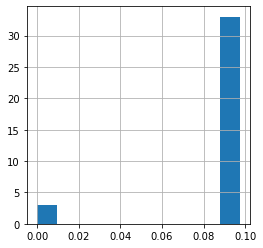

In [11]:
feature_stat['na percentage'].hist(bins=10, figsize=(4,4))

In [12]:
# feature engineering >> handle missing
df=FeatureEngineering.handle_missings(df)


Series([], Name: col, dtype: object)


In [13]:
#describe the numeric values 
# count, std, mean
# percentile values (first, second and third quantiles)
# min, max
# these information can help in outliers detection and removing

df.iloc[:,0:3].describe()

,bedrooms,baths
count,9927.000000,9927.000000
mean,2.309761,1.832880
std,0.848633,0.958422
min,0.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,2.000000
75%,3.000000,2.000000
max,5.000000,6.000000


In [14]:
df=FeatureEngineering.rearrange_features(df)

In [15]:
# get a sample of observations according to query 
df.query('house_price > 3153')

,house_price,bedrooms,baths,On Site Laundry,Air Conditioning,Dishwasher,Deck,Hardwood Floor,Central Heat,Concierge Service,...,Swimming Pool,Onsite Management,Balcony,Ceiling Fan,Controlled Access,FirePlace,Garage Parking,High Ceilings,Outdoor Space,Walk In Closet
0,7800,2,2,1,1,1,1,1,0,1,...,0,1,0,0,0,0,1,1,1,1
1,5499,2,2,1,0,1,1,1,0,0,...,0,0,1,0,0,0,0,1,1,0
2,3250,1,1,1,0,1,1,1,0,0,...,0,0,1,0,0,0,0,1,1,0
3,3905,2,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4250,1,1,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10993,3795,3,1,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
10994,4250,3,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
10995,5400,2,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
10996,7995,1,2,0,0,0,0,1,1,0,...,0,0,0,0,0,0,1,0,1,0


In [16]:
# get a random 5 samples or observations of the data
df.sample(5)

,house_price,bedrooms,baths,On Site Laundry,Air Conditioning,Dishwasher,Deck,Hardwood Floor,Central Heat,Concierge Service,...,Swimming Pool,Onsite Management,Balcony,Ceiling Fan,Controlled Access,FirePlace,Garage Parking,High Ceilings,Outdoor Space,Walk In Closet
81,2750,2,2,1,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4826,4250,3,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2598,1899,2,2,1,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,1
10718,2700,3,3,1,0,0,0,1,0,0,...,0,1,0,1,0,0,1,0,1,0
6543,3088,2,2,0,1,1,1,1,0,1,...,0,1,1,0,0,0,1,0,0,1


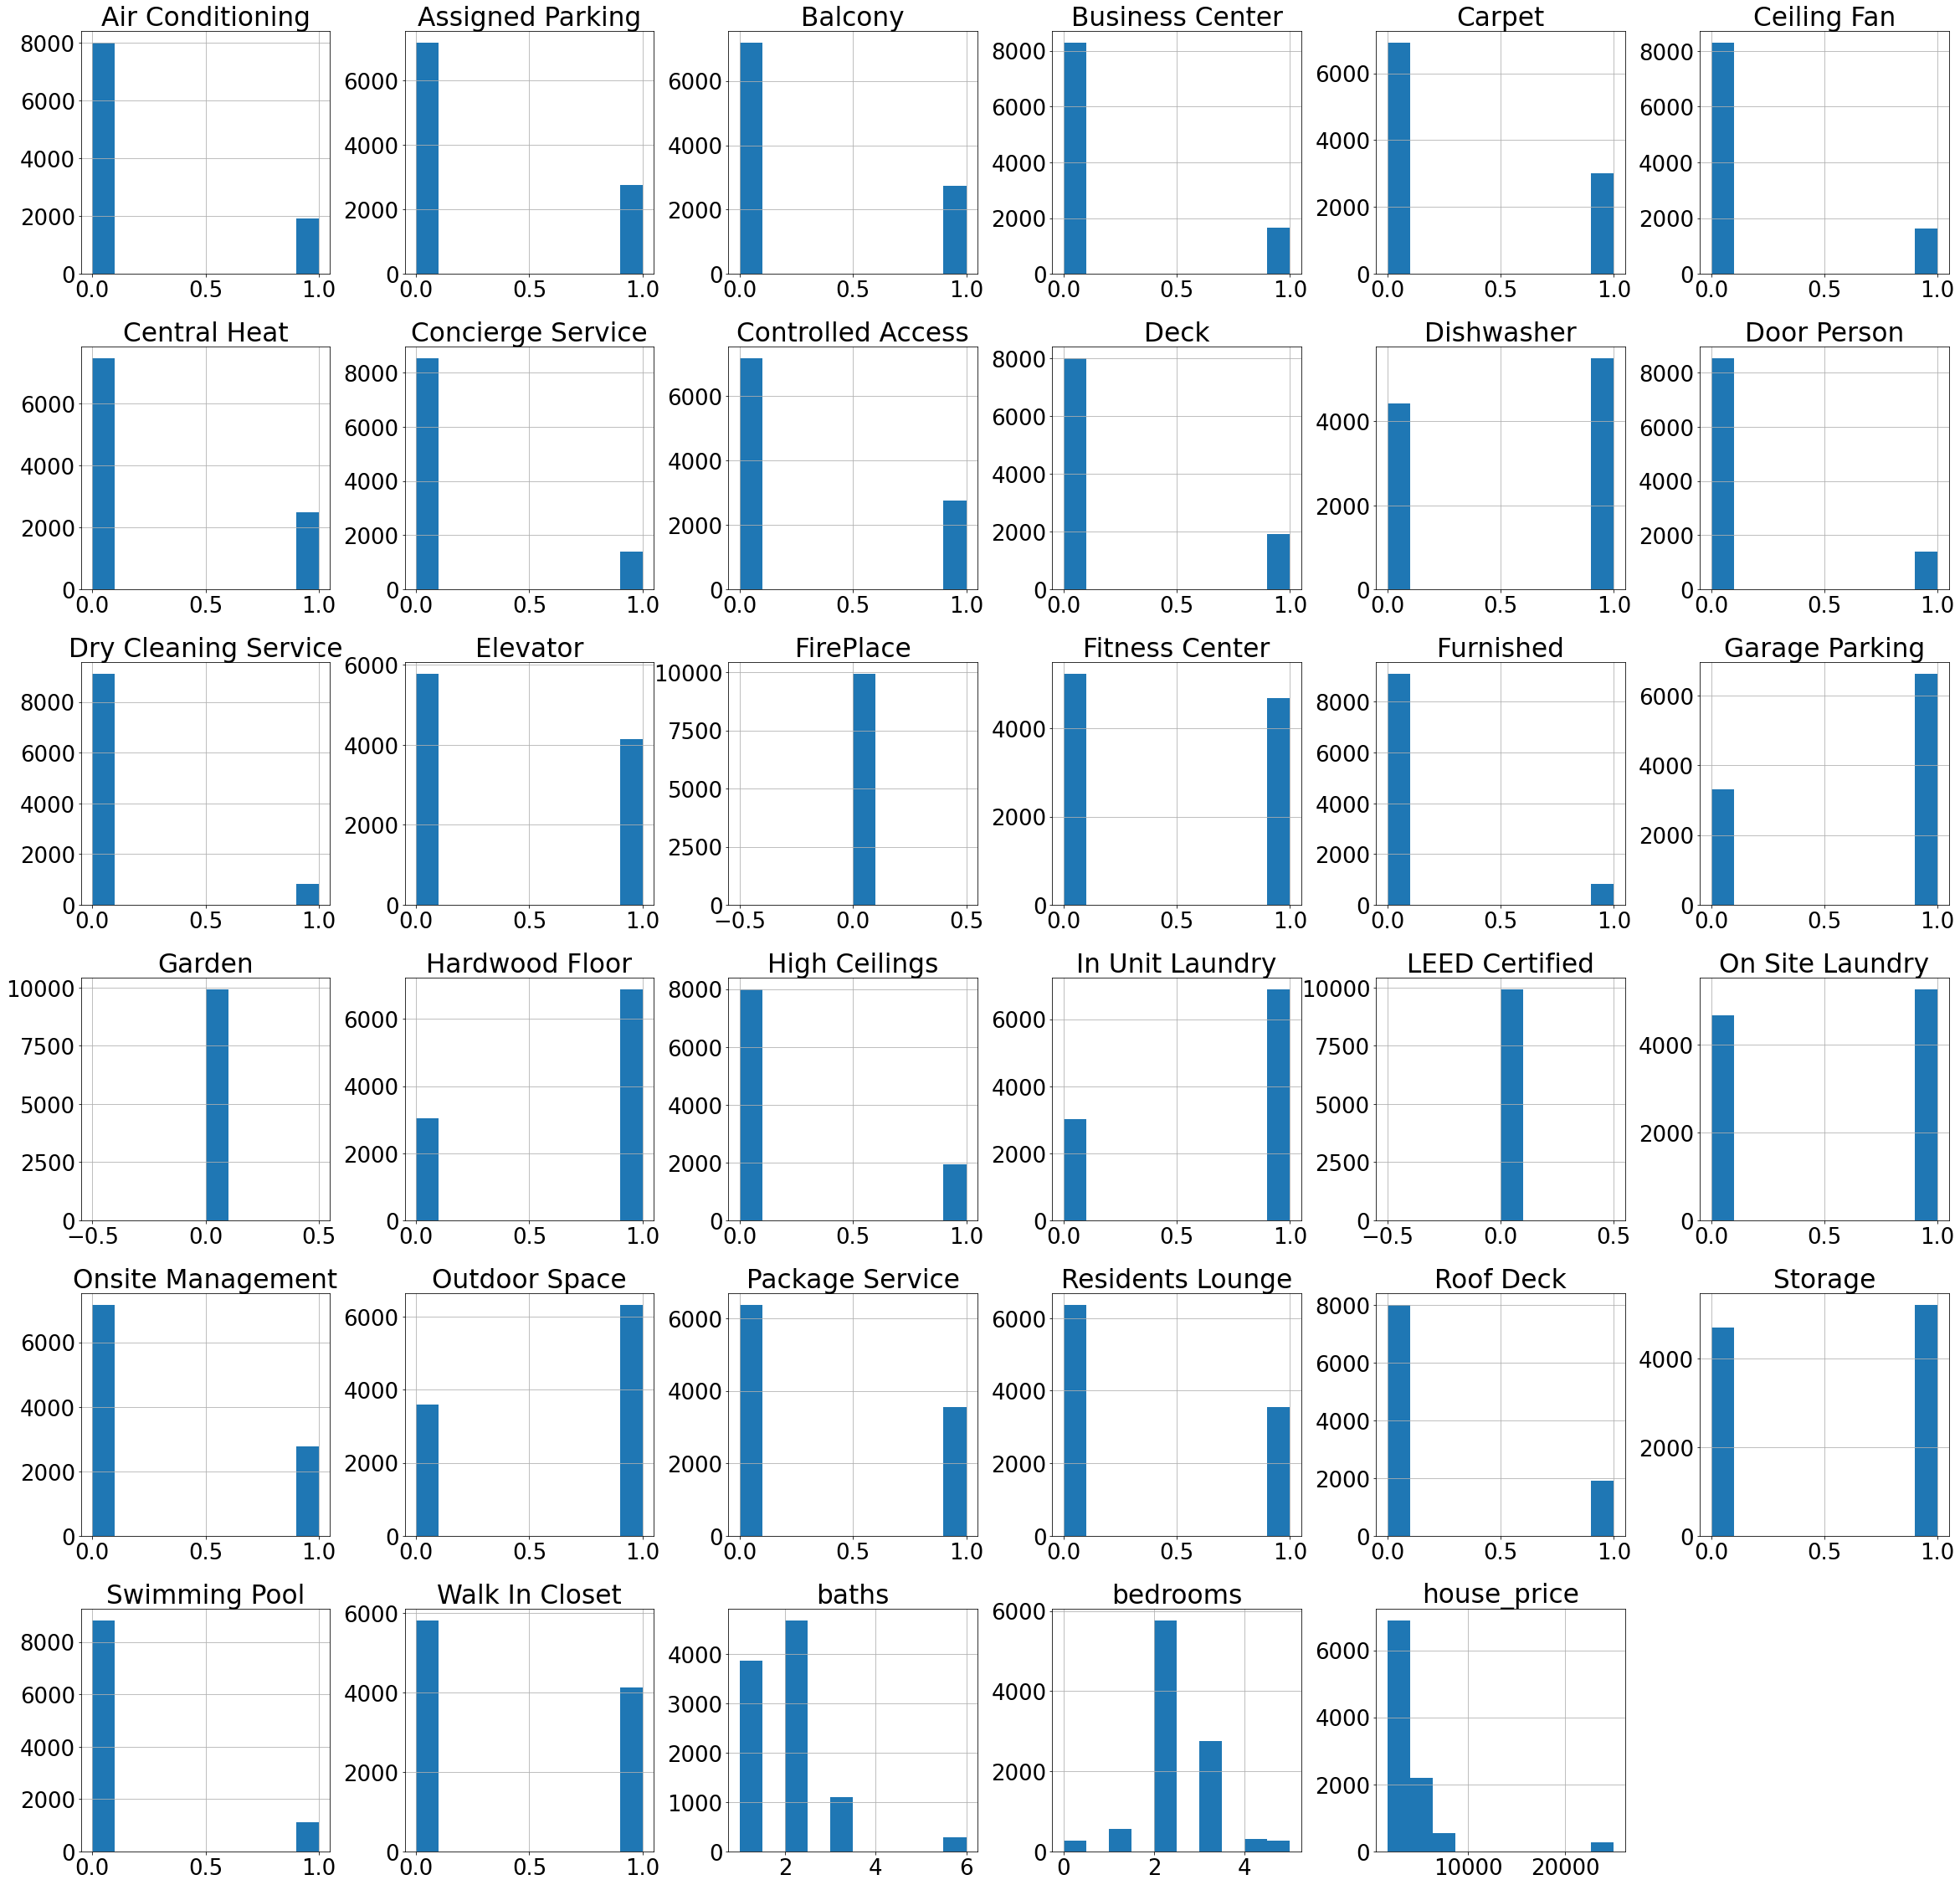

In [17]:
# get a plot for each feature
# shows the values of feature and the coressponding number of observations 
font = {'size'   : 26}
matplotlib.rc('font', **font)
df.hist(bins=10, figsize=(40,40))
plt.savefig('hist.png')

# Correlation using heatmap

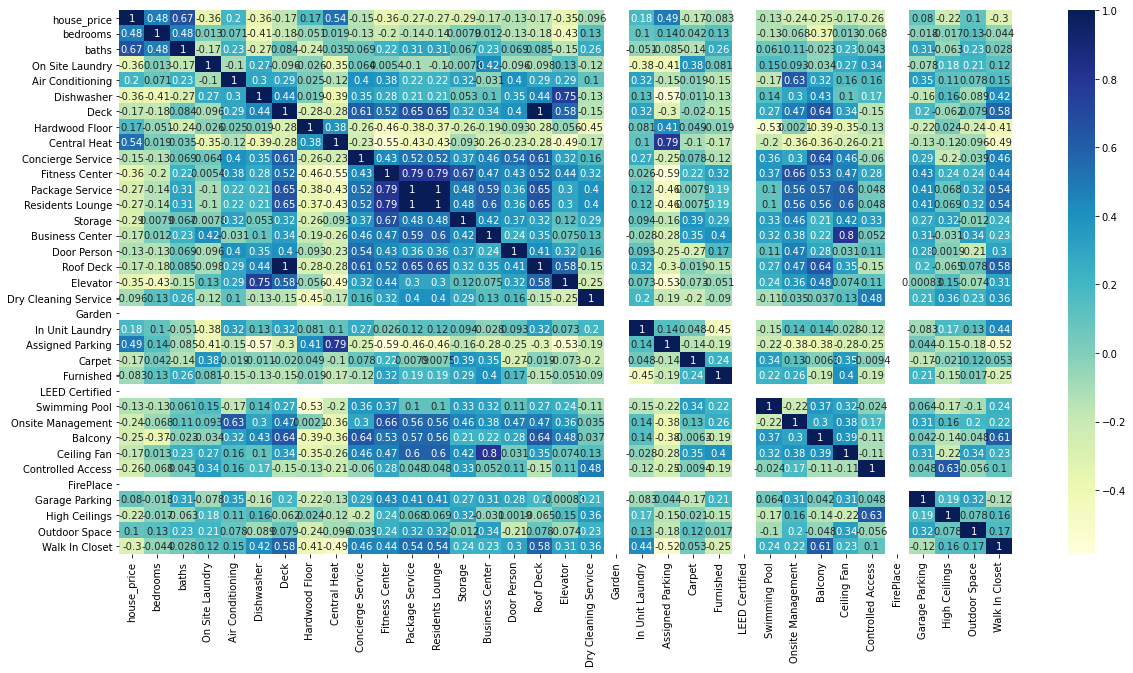

In [18]:
font = {'size'   : 10}
matplotlib.rc('font', **font)
plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [19]:
# correlations to the rental price
corr_matrix = df.corr()

In [20]:
corr_matrix[corr_matrix.index == 'house_price'].T.sort_values('house_price')

,house_price
Fitness Center,-0.362121
Dishwasher,-0.358154
On Site Laundry,-0.355105
Elevator,-0.346836
Walk In Closet,-0.298186
Storage,-0.290150
Package Service,-0.272801
Residents Lounge,-0.272451
Controlled Access,-0.255043
Balcony,-0.254752


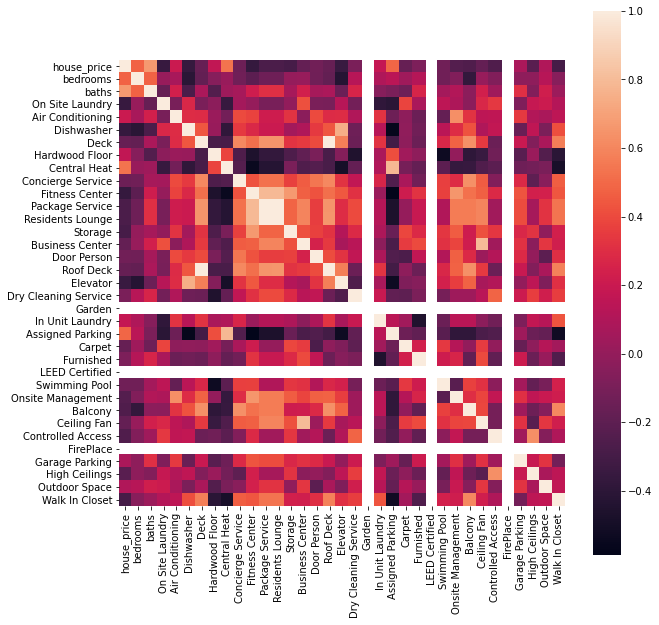

In [21]:
# draw the correlation as a heatmap
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_matrix, square=True)

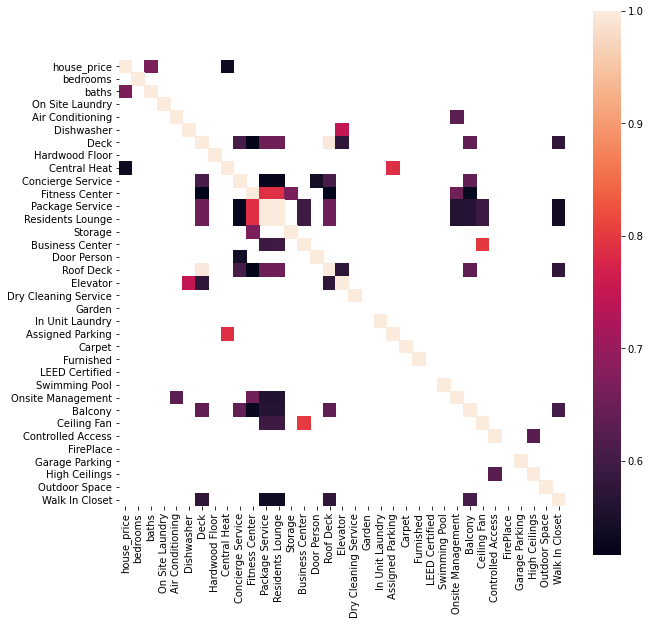

In [22]:
# draw the correlation as a heatmap
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_matrix[corr_matrix> 0.5], square=True)

In [23]:
t = corr_matrix[corr_matrix.index == 'house_price'].T.sort_values('house_price')
t[t['house_price']>=0.3]

,house_price
bedrooms,0.477894
Assigned Parking,0.491432
Central Heat,0.535230
baths,0.667327
house_price,1.000000


In [24]:
t[t['house_price']<=-0.3]

,house_price
Fitness Center,-0.362121
Dishwasher,-0.358154
On Site Laundry,-0.355105
Elevator,-0.346836


In [25]:
t[t['house_price'].isna()].index

Index(['Garden', 'LEED Certified', 'FirePlace'], dtype='object')

In [26]:
# drop column with no correlation 
df = df.drop(columns=t[t['house_price'].isna()].index)

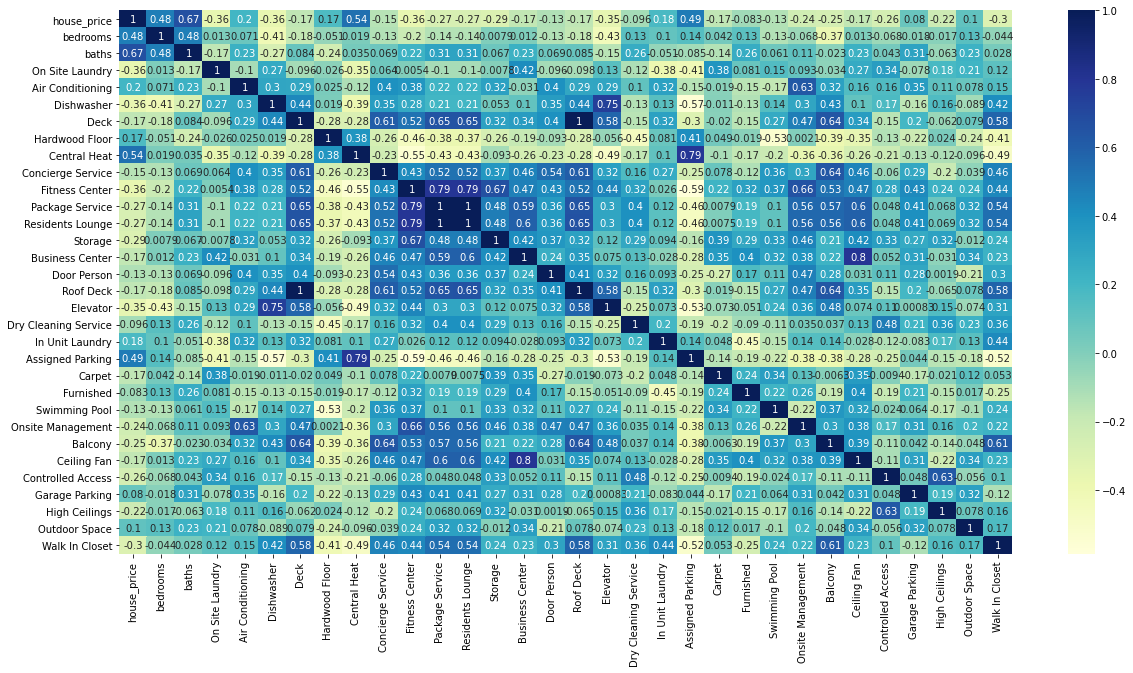

In [27]:
plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

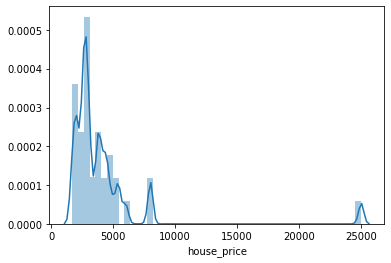

In [28]:
sns.distplot(df['house_price'])

# Outliers Analysis

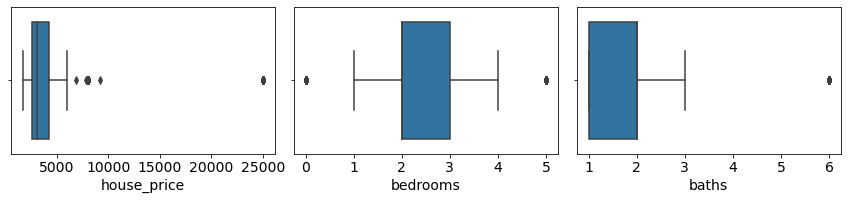

In [29]:
# Outlier Analysis
# boxplots show the quartiles of the dataset for the numeric values
# this help to detect the outliers and remove them 
font = {'size'   : 14}

matplotlib.rc('font', **font)
fig, axs = plt.subplots(1,3, figsize = (12,3))
plt1 = sns.boxplot(df['house_price'], ax = axs[0])
plt2 = sns.boxplot(df['bedrooms'], ax = axs[1])
plt3 = sns.boxplot(df['baths'], ax = axs[2])
plt.tight_layout()


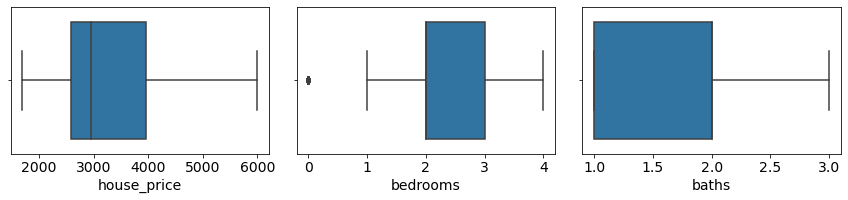

In [30]:
# outliers treatment 
df = FeatureEngineering.drop_outliers(df,'house_price')

font = {'size'   : 14}

matplotlib.rc('font', **font)
fig, axs = plt.subplots(1,3, figsize = (12,3))
plt1 = sns.boxplot(df['house_price'], ax = axs[0])
plt2 = sns.boxplot(df['bedrooms'], ax = axs[1])
plt3 = sns.boxplot(df['baths'], ax = axs[2])
plt.tight_layout()

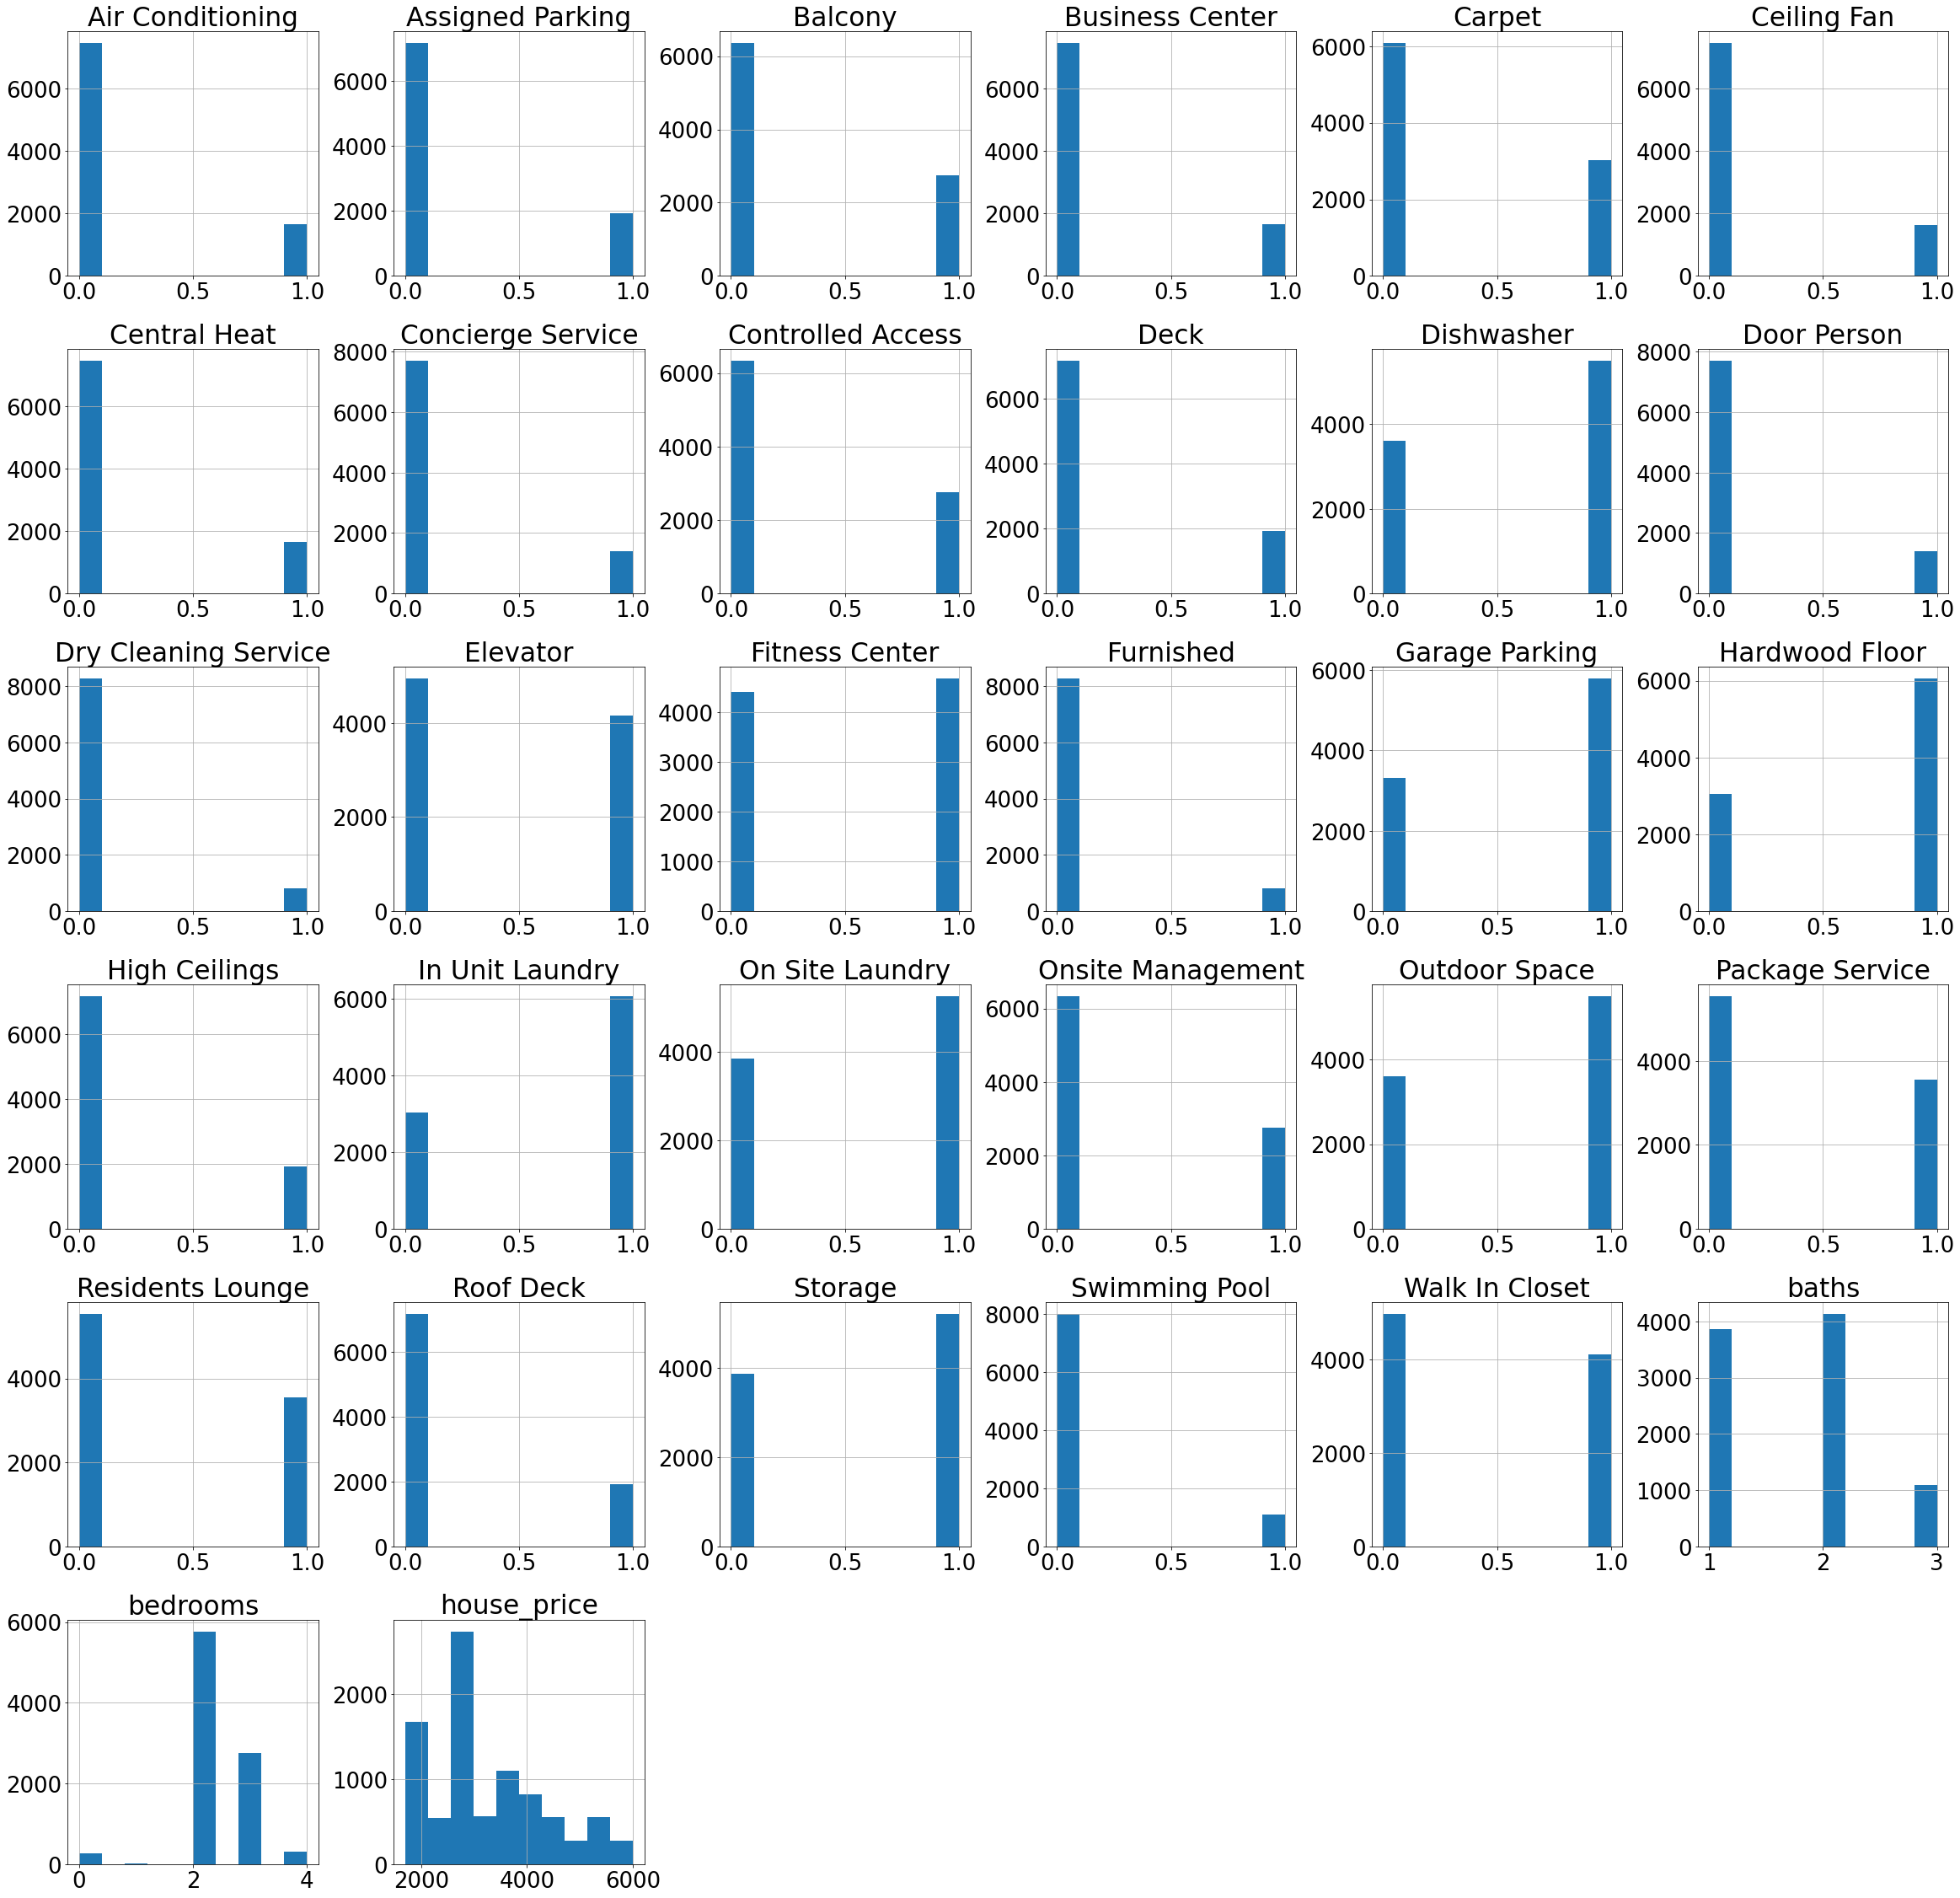

In [31]:
# get a plot for each feature
# shows the values of feature and the coressponding number of observations 
font = {'size'   : 26}
matplotlib.rc('font', **font)
df.hist(bins=10, figsize=(40,40))
plt.savefig('hist.png')

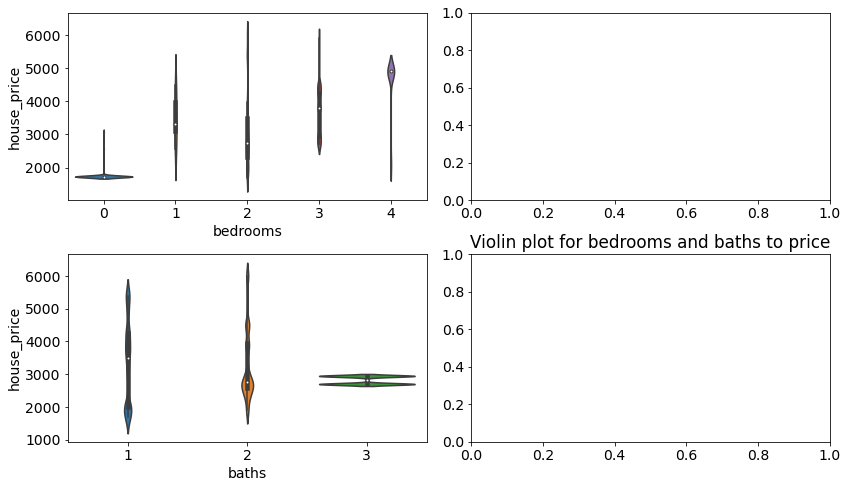

In [39]:
font = {'size'   : 14}
matplotlib.rc('font', **font)

fig, axs = plt.subplots(2,2, figsize = (12,7))
plt1 = sns.violinplot(df['bedrooms'], df['house_price'], ax = axs[0,0])
plt2 = sns.violinplot(df['baths'], df['house_price'], ax = axs[1,0])

plt.tight_layout()


#plt.xticks(rotation=45)
plt.title("Violin plot for bedrooms and baths to price")
plt.savefig('violinplot.png')

In [33]:
# getting correlation between features
corr_df = corr_matrix.unstack().rename('correlation').reset_index().rename(columns={'level_0':'feature1',
                                                                     'level_1':'feature2'})

In [34]:
corr_df

,feature1,feature2,correlation
0,house_price,house_price,1.000000
1,house_price,bedrooms,0.477894
2,house_price,baths,0.667327
3,house_price,On Site Laundry,-0.355105
4,house_price,Air Conditioning,0.204852
...,...,...,...
1220,Walk In Closet,FirePlace,NaN
1221,Walk In Closet,Garage Parking,-0.120921
1222,Walk In Closet,High Ceilings,0.155043
1223,Walk In Closet,Outdoor Space,0.167776


In [35]:
corr_df[corr_df['feature1'] != corr_df['feature2']].sort_values('correlation')

,feature1,feature2,correlation
371,Fitness Center,Assigned Parking,-0.586405
745,Assigned Parking,Fitness Center,-0.586405
196,Dishwasher,Assigned Parking,-0.565457
740,Assigned Parking,Dishwasher,-0.565457
290,Central Heat,Fitness Center,-0.545706
...,...,...,...
1179,Outdoor Space,LEED Certified,NaN
1185,Outdoor Space,FirePlace,NaN
1209,Walk In Closet,Garden,NaN
1214,Walk In Closet,LEED Certified,NaN


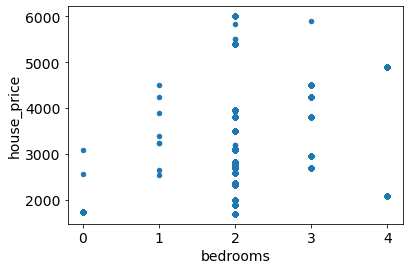

In [40]:
# relation between bedrooms and house price
df[['bedrooms', 'house_price']].plot.scatter(x='bedrooms', y='house_price')

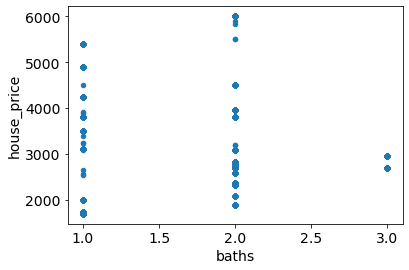

In [44]:
# relation between baths and house price
df[['baths', 'house_price']].plot.scatter(x='baths', y='house_price')

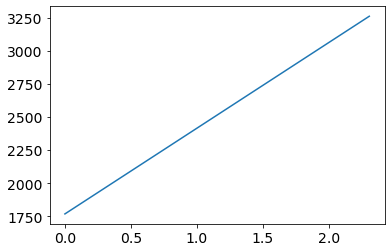

In [45]:
# simple prediction for price mean 
def predict(df, feature, target):
    feat_mean, target_mean = df[[feature,target]].mean().values
    feat_std, target_std = df[[feature,target]].std().values
    r=df[[feature,target]].corr().iloc[0,1]
    m = r * (target_std/feat_std)
    #Price_mean = m * feat_mean + b ??
    b = target_mean - (m * feat_mean )
    plt.plot([0, feat_mean], [b, target_mean])
    return m,b,feat_mean, target_mean


m,b,bed_mean,Price_mean = predict(df,'bedrooms','house_price')

4358.200398008625


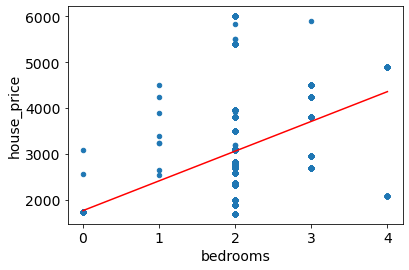

In [46]:
max_val = df['bedrooms'].max()
predicted = max_val * m + b
print(predicted)
df[['bedrooms', 'house_price']].plot.scatter(x='bedrooms', y='house_price')

plt.plot([0, bed_mean, max_val],
         [b, Price_mean, predicted],
         color='r')

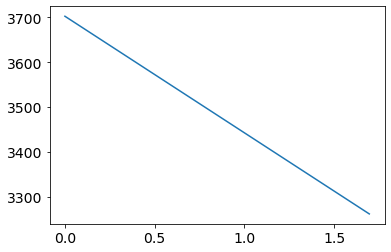

In [47]:
m1,b1,bath_mean,Price_mean1 = predict(df,'baths','house_price')

2923.249275928215


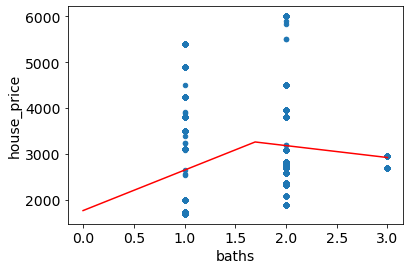

In [48]:
max_val = df['baths'].max()
predicted = max_val * m1 + b1
print(predicted)
df[['baths', 'house_price']].plot.scatter(x='baths', y='house_price')

plt.plot([0, bath_mean, max_val],
         [b, Price_mean1, predicted],
         color='r')

In [49]:
# get the categorial data
data_categorial = df.drop(['bedrooms','baths'],axis=1)
categorial_columns = data_categorial.columns.tolist()
categorial_columns.remove('house_price')
data_categorial.head()

,house_price,On Site Laundry,Air Conditioning,Dishwasher,Deck,Hardwood Floor,Central Heat,Concierge Service,Fitness Center,Package Service,...,Furnished,Swimming Pool,Onsite Management,Balcony,Ceiling Fan,Controlled Access,Garage Parking,High Ceilings,Outdoor Space,Walk In Closet
1,5499,1,0,1,1,1,0,0,1,0,...,0,0,0,1,0,0,0,1,1,0
2,3250,1,0,1,1,1,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
3,3905,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4250,1,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1
5,5825,1,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1


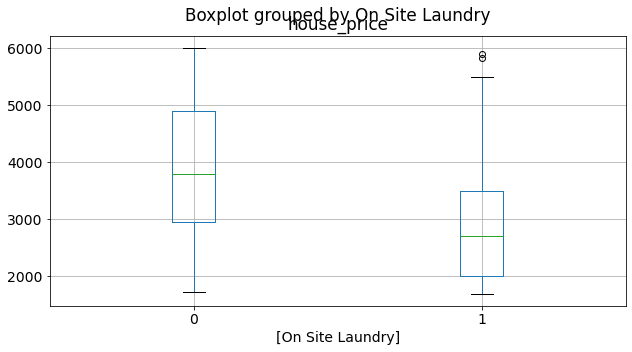

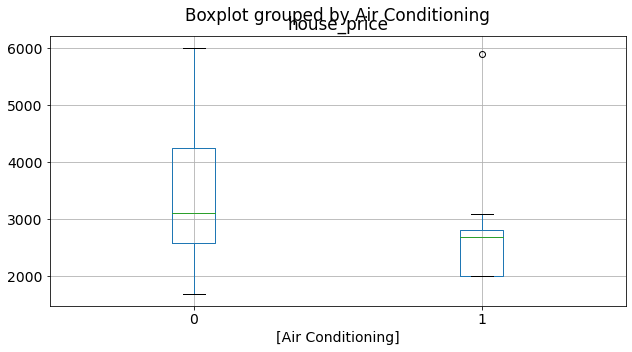

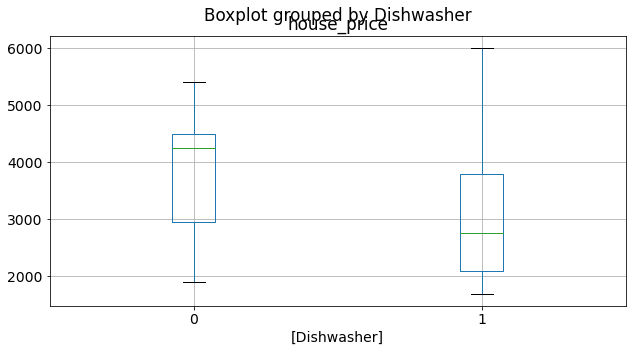

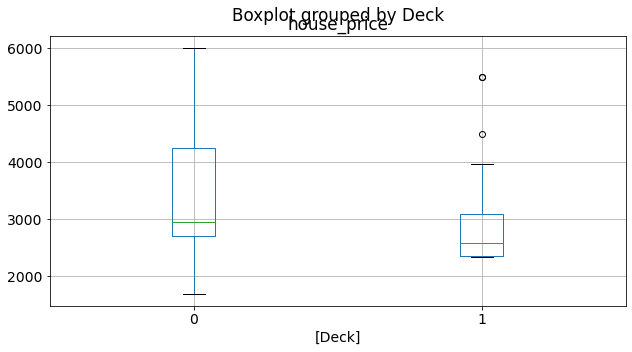

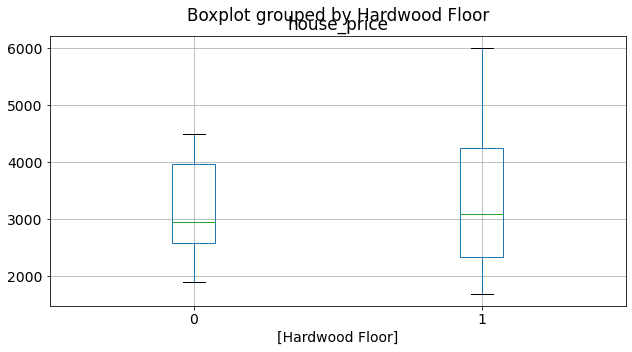

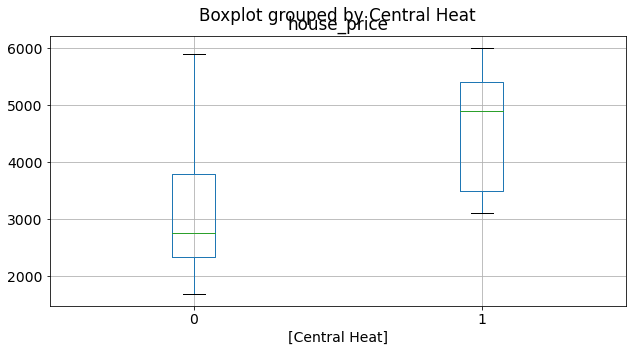

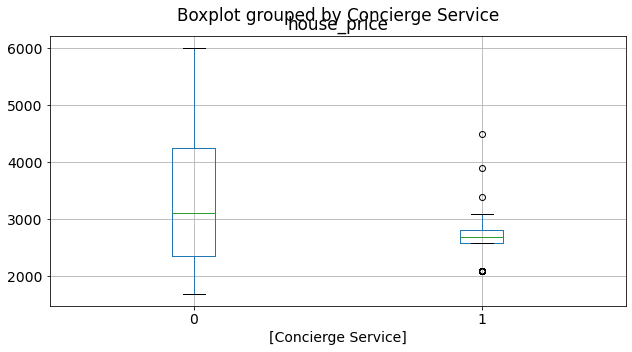

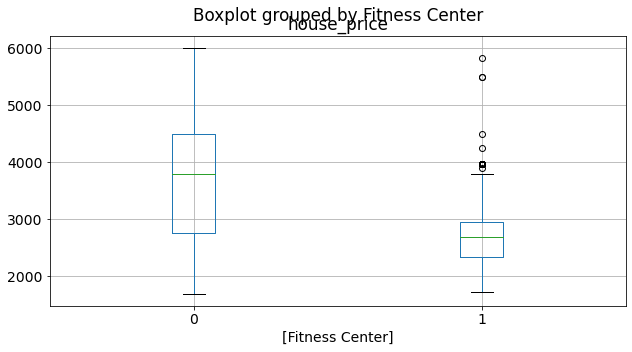

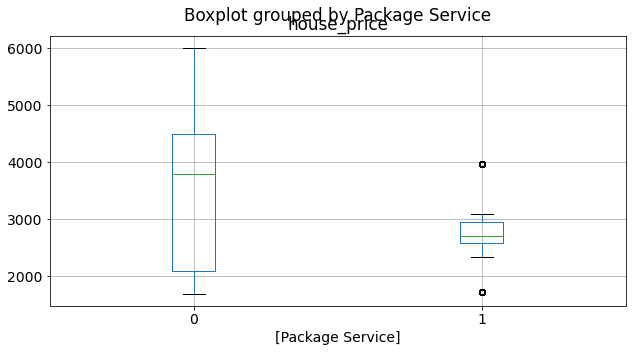

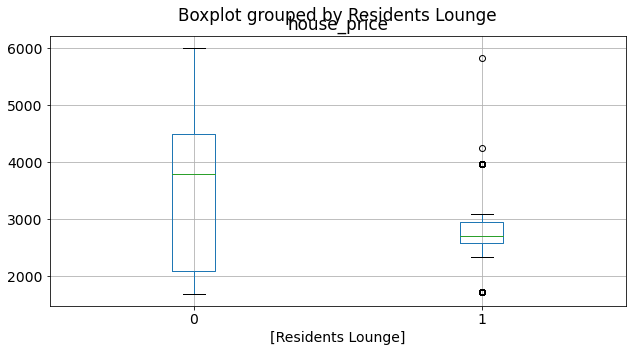

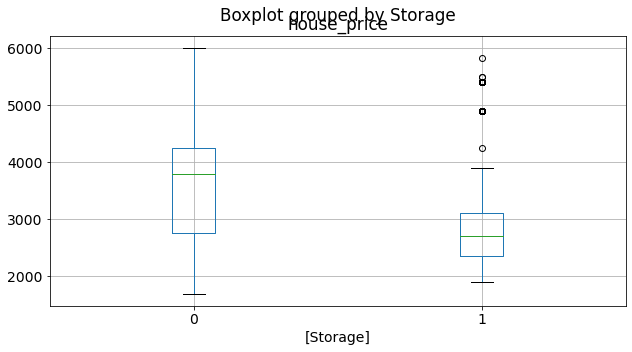

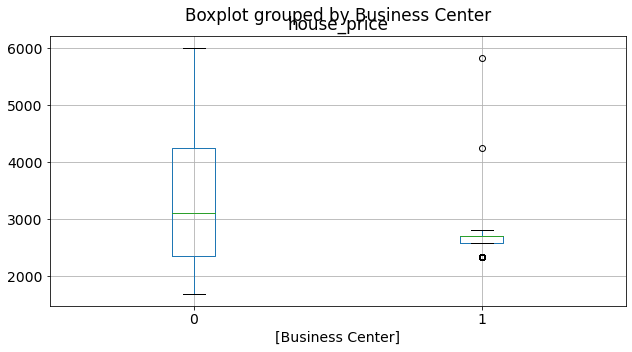

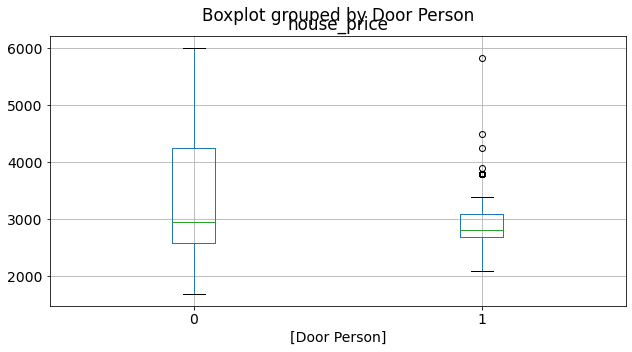

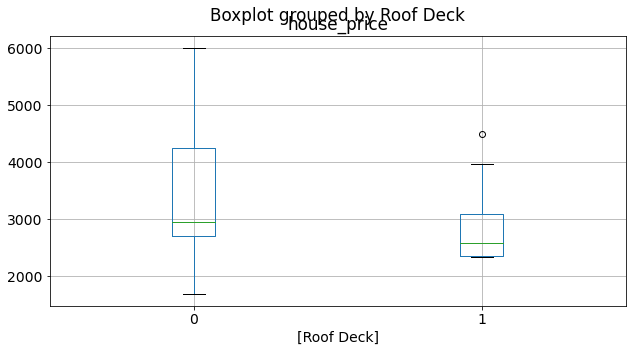

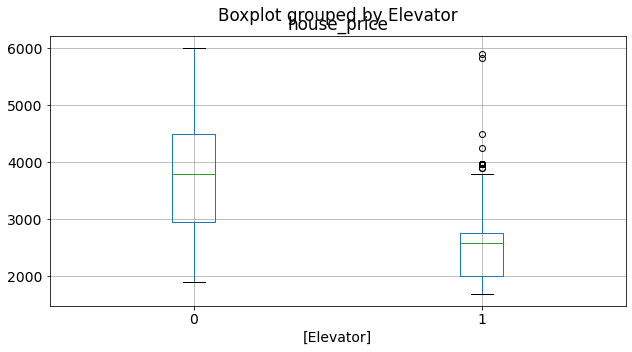

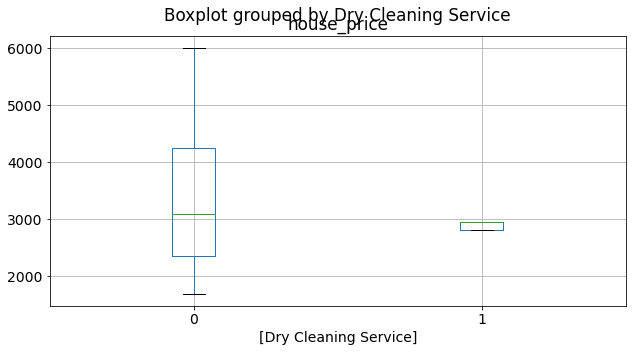

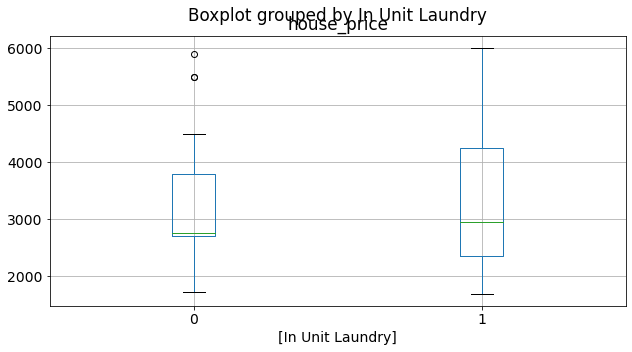

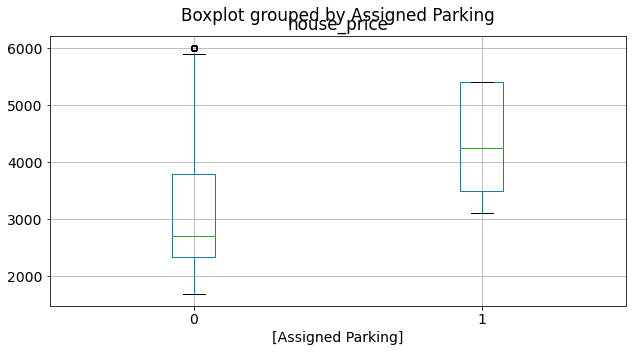

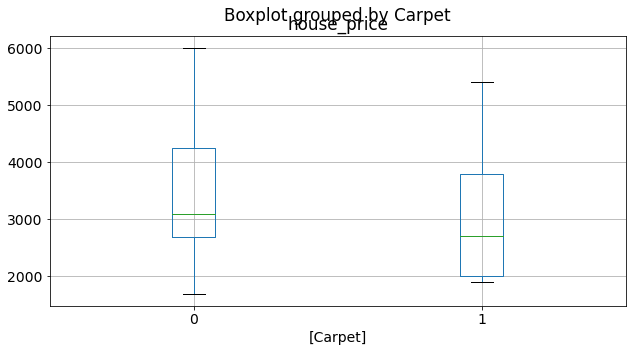

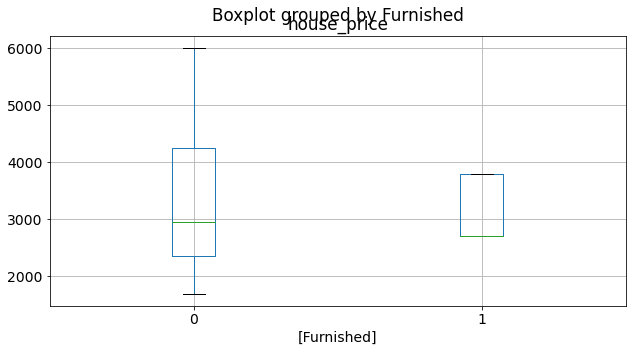

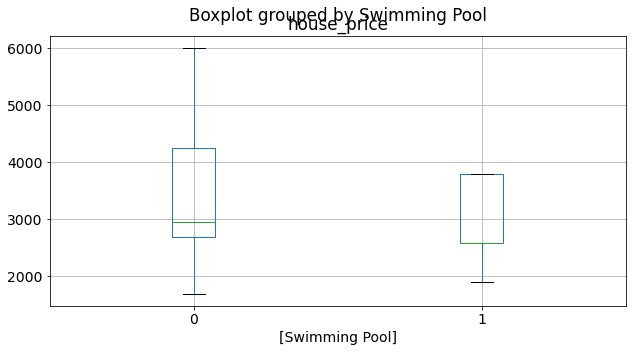

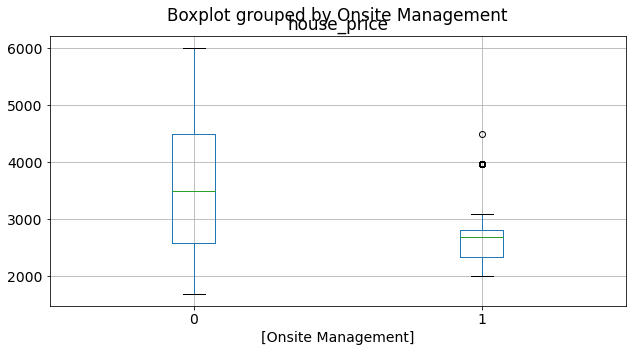

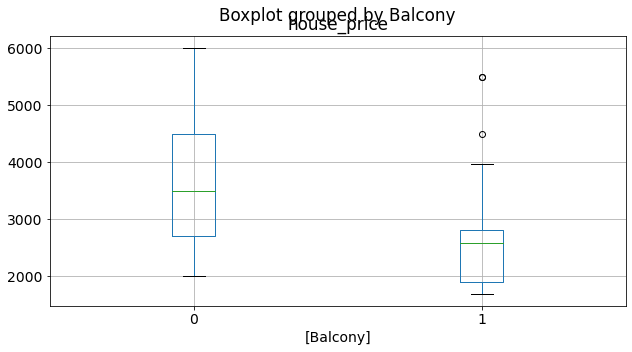

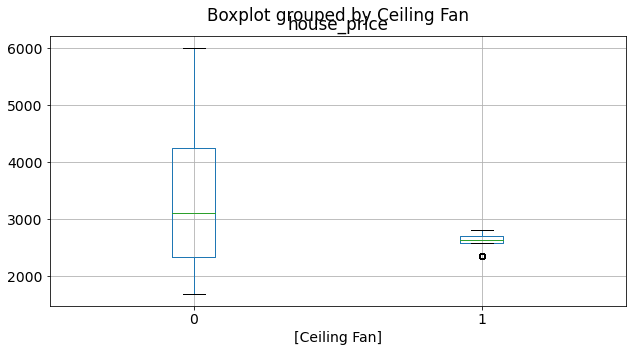

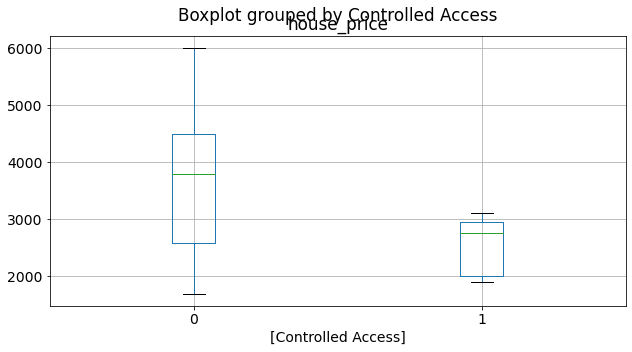

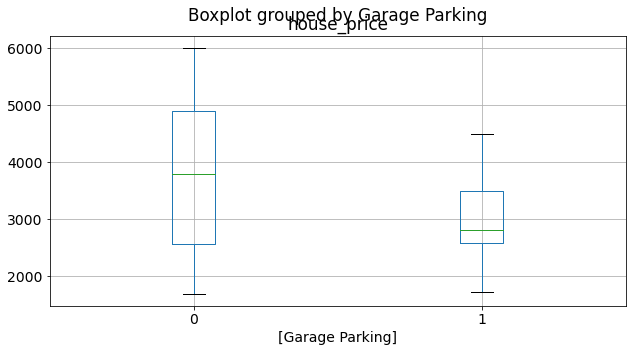

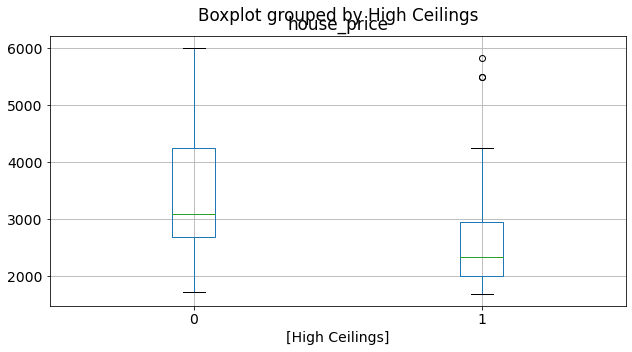

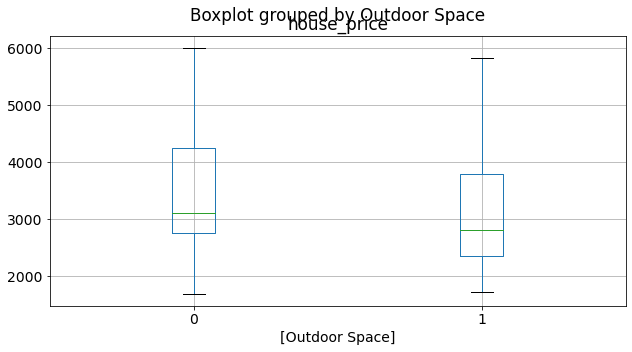

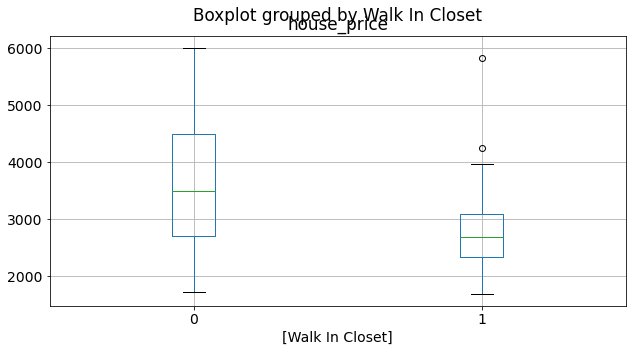

In [50]:
for one_categorial_feature in categorial_columns:
    data_categorial[['house_price', one_categorial_feature]].boxplot(by=one_categorial_feature, figsize=(10,5))
    plt.show()